In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#données du problème :

n=100#discretisation

#temps:
t0=0
tf=299
lt=np.linspace(t0,tf,n+1)

#charge
Qm=60
c0=0.2
cf=1

#prix
ph=1
pb=0.5

#Intensité
Im=1

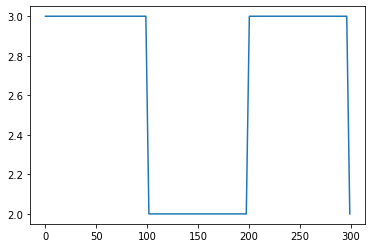

In [3]:
def PrixHoraire(t,ph,pb):
    n=np.floor(t)
    if n%200 < 99:
        return ph
    else:
        return pb
    
VPrixHoraire= np.vectorize(PrixHoraire)
lprix=VPrixHoraire(lt,3,2)
plt.plot(lt,lprix)
plt.show()

In [4]:
def charge(I): #donne la charge à tout temps(charge absolue, pas en %)
    c=c0*Qm
    charge=np.zeros(n)
    for i in range (n):
        Q=-(lt[i+1]-lt[i])*(I[i])
        c+=Q
        charge[i]=c
    return charge

In [5]:
def fcout1(I): 
    S=0
    listeS=[]
    for i in range (n):
        Q=-(lt[i+1]-lt[i])*I[i]
        P=PrixHoraire(lt[i],ph,pb) #On suppose ici que l'on ne change pas de prix horaire sur l'intervalle listet[i], listet[i+1]
        S+=P*Q
        listeS.append(S)
    return S,np.array(listeS)

In [6]:
def I0(): #Intensité qui respecte les contraintes mais n'est pas optimale
    res=np.zeros(n)
    for i in range (n):
        res[i]=-Qm*(cf-c0)/(tf-t0)
    return(res)


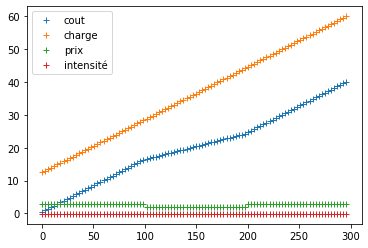

In [8]:
def affichage(I):    
    lcout=fcout1(I)[1]
    lcharge=charge(I)
    lprix=VPrixHoraire(lt[0:n],3,2)
    plt.plot(lt[0:n],lcout,'+',label="cout")
    plt.plot(lt[0:n],lcharge,'+',label="charge")
    plt.plot(lt[0:n],lprix,'+',label="prix")
    plt.plot(lt[0:n],I[:n],'+',label="intensité")
    plt.legend()
    plt.plot()
I=I0()
affichage(I)

In [9]:
def gradfcout():
    G=np.zeros(n)
    for i in range (n):
        p=PrixHoraire(lt[i],ph,pb)
        q=(lt[i+1]-lt[i])
        G[i]=-p*q
    return G

In [10]:
def C(I):

    A=np.zeros ((2*n+2,n))
    
    # Contrainte égalité (chargement)
    A[0,:]=np.array([lt[i+1]-lt[i] for i in range (n)])
    A[1,:]=-np.array([lt[i+1]-lt[i] for i in range (n)])
    #Contraintes inégalités ( limitation de la borne)
    for i in range (n):
        A[i+2,i]=-1
        A[n+i+2,i]=1
    B=np.zeros(2*n+2)
    B[0]=-(cf-c0)*Qm
    B[1]=(cf-c0)*Qm
    for i in range(2,n+2):
        B[i]=Im
    for i in range(n+2,2*n+2):
        B[i]=0
    c=np.dot(A,I)-B
    return c


In [12]:
def gradC():
    A=np.zeros ((2*n+2,n))
    # Contrainte égalité (chargement)
    A[0,:]=np.array([lt[i+1]-lt[i] for i in range (n)])
    A[1,:]=-np.array([lt[i+1]-lt[i] for i in range (n)])
    #Contraintes inégalités ( limitation de la borne)
    for i in range (n):
        A[i+2,i]=-1
        A[n+i+2,i]=1
    
    return A

In [13]:
def Algo(l=1e-3, rho=1e-3, max_iter=10000,epsilon=1e-3):
    lamb=np.array([1 for i in range (2*n+2)])
    A=gradC()
    G=gradfcout()
    gLap=G+np.dot(lamb,A)
    xk=I0()
    #xk=np.zeros((n))
    k=0
    L=[]
    while (k<max_iter) and (np.linalg.norm(G+np.dot(lamb,A))>epsilon):
        k+=1
        L.append(np.linalg.norm(G+np.dot(lamb,A)))
        glap=G+np.dot(lamb,A)
        xk=xk-l*(G+np.dot(lamb,A))
        lamb=lamb+rho*C(xk)
        for i in range (len(lamb)):
            if lamb[i]<=0:
                lamb[i]=0
        #print(xk[50])
        
    print("Nb d'itération'",k)
    print("grad lagrangien :",np.linalg.norm(G+np.dot(lamb,A)))
    #print("lambda final : ",lamb)
    
    return xk,L

In [18]:
I1,L=Algo()

Nb d'itération' 10000
grad lagrangien : 25.937213098314093


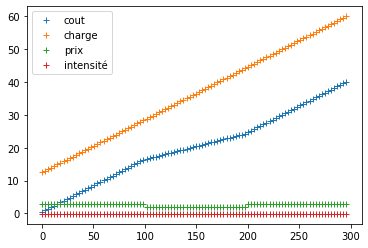

In [19]:
affichage(I1)

In [17]:
def wolfe_step(fun, grad_fun, xk, pk, c1 = 0.25, c2 = 0.75, M = 1000):
    a=0
    b=0
    l=1
    i=0
    B1=fun(xk+l*pk)<=fun(xk)+c1*l*np.dot(np.transpose(grad_fun(xk)),pk)
    B2=np.dot(np.transpose(grad_fun(xk+l*pk)),pk)>=c2*np.dot(np.transpose(grad_fun(xk)),pk)
    while B1*B2==0 and i<M:
        if B1==0:
            b=l
            l=(a+b)/2.0
        else:
            a=l
            if b==0:
                l=2*l
            else:
                l=(a+b)/2.0
        B1=fun(xk+l*pk)<=fun(xk)+c1*l*np.dot(np.transpose(grad_fun(xk)),pk)
        B2=np.dot(np.transpose(grad_fun(xk+l*pk)),pk)>=c2*np.dot(np.transpose(grad_fun(xk)),pk)
        i+=1

    return l

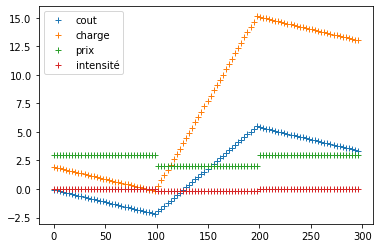

In [148]:
affichage(I1)

In [149]:
check(I1)

chargement:NO
borne:NO


In [130]:
def Lag(x,lamb):
    return fcout1(x)[0] + np.dot(lamb,C(x))

In [131]:
def GradLag(x,lamb):
    return gradfcout()+np.dot(lamb,gradC())

In [140]:
def AlgoW(rho=1e-0, max_iter=10000,epsilon=1e-8):
    lamb=np.array([0.1 for i in range (2*n+2)])
    A=gradC()
    G=gradfcout()
    gLap=G+np.dot(lamb,A)
    xk=I0()
    k=0
    while (k<max_iter) and (np.linalg.norm(G+np.dot(lamb,A))>epsilon):
        k+=1
        print(k)
        glap=G+np.dot(lamb,A)
        l=wolfe_step(lambda x:Lag(x,lamb),lambda x:GradLag(x,lamb), xk,-glap)
        xk=xk-l*(G+np.dot(lamb,A))
        lamb=lamb+rho*C(xk)
        for i in range (len(lamb)):
            if lamb[i]<=0:
                lamb[i]=0
        
    print("Nb d'itération'",k)
    print("grad lagrangien :",np.linalg.norm(G+np.dot(lamb,A)))
    print("lambda final : ",lamb)
    return xk

# Méthode "affine scaling"



In [336]:
#on construit la liste des indices correspondants aux heures creuses
Tc=[]
for i in range (len(lt)-1):
    m=np.floor(lt[i])
    if not m%200 < 99:
        Tc.append(i)
        
m=len(Tc) #nombre de contraintes à ajouter
print(m)

A=np.zeros ((1+m,n+m))
    
# Contrainte égalité (chargement)
A[0][:n]=np.array([lt[i+1]-lt[i] for i in range (n)])
#contraintes inégalites
for i in range (m):
    A[i+1,Tc[i]]=1
    A[i+1,n+i]=1

    
B=np.zeros(1+m)
B[0]=(cf-c0)*Qm
for i in range(m):
    B[i+1]=Im

C=np.zeros(n+m)
for i in range(n):
    C[i]=PrixHoraire(lt[i],ph,pb)*(lt[i+1]-lt[i])

    
print(np.shape(A))

33
(34, 133)


In [337]:
def neg(x):
    
    for i in range(len(x)):
        if x[i]>=0:
            return 0
    return 1
def sup(x):
    for i in range(len(x)):
        if x[i]<0:
            return 0
    return 1

In [358]:
def algoASA(max_iter=10000,epsi=1e-6,beta=0.9):

    xk=-I0()

    k=0
    m=np.shape(A)[0]-1
    Z=np.array([Im-xk[Tc[i]] for i in range (m)])#variables d'écarts
    xk=np.concatenate((xk,Z),axis=0)
    Xk=np.diag(xk)
    e=np.array([1 for i in range(n+m)])
    H1=np.matmul(np.matmul(A,Xk),np.matmul(Xk,np.transpose(A)))
    H2=np.matmul(np.dot(A,Xk),np.dot(Xk,C))
    pk=np.matmul(np.linalg.inv(H1),H2)
    rk=C-np.dot(np.transpose(A),pk)
    while k<max_iter:
        if sup(rk) and np.dot(e,np.dot(Xk,rk))<epsi:
            return xk
        G=np.dot(np.dot(Xk,Xk),rk)
        if sup(-G):
            return ("solution non finie")
        xk=xk-beta*G/np.linalg.norm(np.dot(Xk,rk))
        Xk=np.diag(xk)
        
        H1=np.matmul(np.dot(A,Xk),np.matmul(Xk,np.transpose(A)))
        H2=np.matmul(np.dot(A,Xk),np.matmul(Xk,C))
        pk=np.matmul(np.linalg.inv(H1),H2)
        rk=C-np.dot(np.transpose(A),pk)
        k+=1
        if k%500==0:
            print(k)
    
    return xk

In [369]:
I=-algoASA()

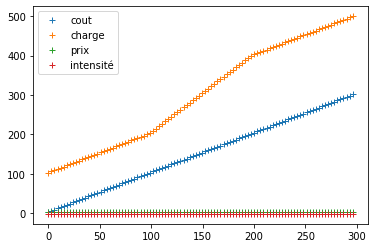

In [370]:
affichage(I)

In [367]:
print(I)

[-6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15 -6.74953655e-15
 -6.74953655e-15 -6.74953655e-15 -8.17257961e-01 -8.15347203e-01
 -8.16559386e-01 -8.15429404e-01 -8.14273646e-01 -8.14260505e-01
 -8.17661793e-01 -8.14560079e-01 -8.14584927e-01 -8.15268156e-01
 -8.16597479e-01 -8.14907650e-01 -8.14249039e-01 -8.16411596e-01
 -8.22278398e-01 -8.16995229e-01 -8.14472207e-01 -8.13718647e-01
 -8.15237561e-01 -8.13815978e-01 -8.12731577e-01 -8.15056479e-01
 -8.14312190e-01 -8.09760563e-01 -8.19939129e-01 -8.14194792e-01
 -8.18225818e-01 -8.18038